# Refactored Honeypot Detection Analysis

This notebook analyzes honeypot scores to identify suspicious servers and common risk signals.

In [8]:
import pandas as pd
import json
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

# Show full column content
pd.set_option('display.max_colwidth', None)

# --- Setup ---
DATA_FILE = Path("../../data/honeypot_score/honeypot_scores.json")
sns.set_theme(style="whitegrid")

# --- Load Dataset ---
def load_json_df(file_path):
    try:
        with open(file_path, "r") as f:
            return pd.DataFrame(json.load(f))
    except FileNotFoundError:
        print(f"Warning: {file_path} not found.")
        return pd.DataFrame()

scores_df = load_json_df(DATA_FILE)
if not scores_df.empty:
    print(f"Loaded {len(scores_df)} server scores.")

Loaded 1665 server scores.


## Full Server Data
This table shows the complete dataset of all analyzed servers.

In [9]:
if not scores_df.empty:
    display(scores_df)

,host,port,honeypot_score,risk_level,signals
0,137.184.244.174,50001,66,MEDIUM,"[no_tls_certificate_detected, cannot_serve_history, missing_p2wpkh_support, missing_taproot_support, identical_behavior_cluster_944]"
1,194.233.69.180,50001,66,MEDIUM,"[no_tls_certificate_detected, cannot_serve_history, missing_p2wpkh_support, missing_taproot_support, identical_behavior_cluster_944]"
2,35.189.13.187,50001,66,MEDIUM,"[no_tls_certificate_detected, cannot_serve_history, missing_p2wpkh_support, missing_taproot_support, identical_behavior_cluster_944]"
3,23.155.96.131,50002,91,HIGH,"[reused_certificate_cluster_of_15, self_signed_or_unknown_issuer, suspicious_subject_CN, cannot_serve_history, missing_p2wpkh_support, missing_taproot_support, identical_behavior_cluster_15]"
4,159.69.244.130,50002,83,HIGH,"[reused_certificate_cluster_of_19, self_signed_or_unknown_issuer, suspicious_subject_CN, identical_behavior_cluster_263]"
...,...,...,...,...,...
1660,34.96.220.189,50001,66,MEDIUM,"[no_tls_certificate_detected, cannot_serve_history, missing_p2wpkh_support, missing_taproot_support, identical_behavior_cluster_944]"
1661,15.184.160.64,50002,77,HIGH,"[reused_certificate_cluster_of_16, self_signed_or_unknown_issuer, suspicious_subject_CN, identical_behavior_cluster_263]"
1662,34.87.227.41,50001,66,MEDIUM,"[no_tls_certificate_detected, cannot_serve_history, missing_p2wpkh_support, missing_taproot_support, identical_behavior_cluster_944]"
1663,34.101.170.221,50001,66,MEDIUM,"[no_tls_certificate_detected, cannot_serve_history, missing_p2wpkh_support, missing_taproot_support, identical_behavior_cluster_944]"


## Honeypot Score Distribution
This histogram shows the distribution of honeypot scores across all servers. Higher scores indicate a higher likelihood of being a honeypot.

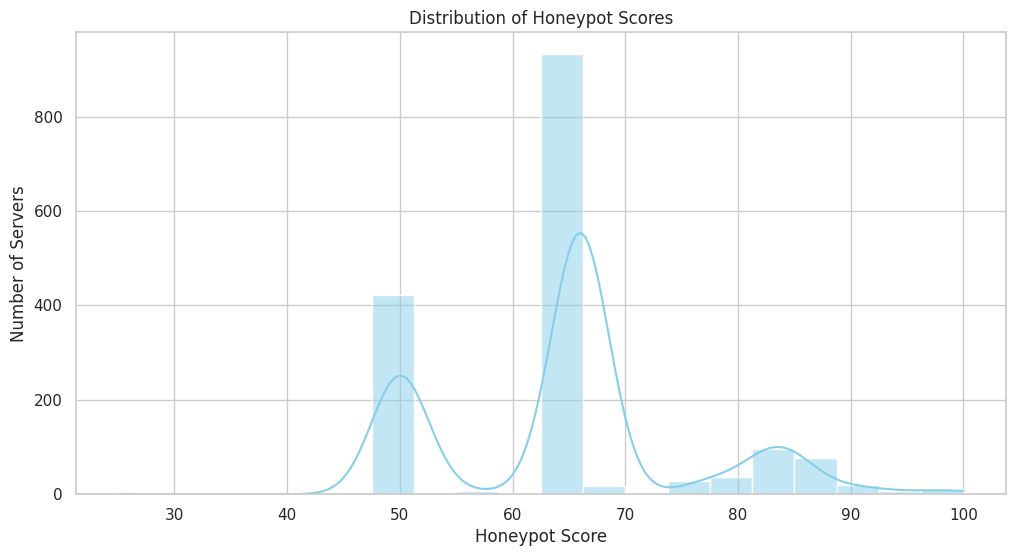

In [10]:
if not scores_df.empty:
    plt.figure(figsize=(12, 6))
    sns.histplot(scores_df['honeypot_score'], bins=20, kde=True, color='skyblue')
    plt.title('Distribution of Honeypot Scores')
    plt.xlabel('Honeypot Score')
    plt.ylabel('Number of Servers')
    plt.show()

## Most Common Suspicious Signals (All Servers)
This graph shows the frequency of the top 15 most common signals detected across all servers.

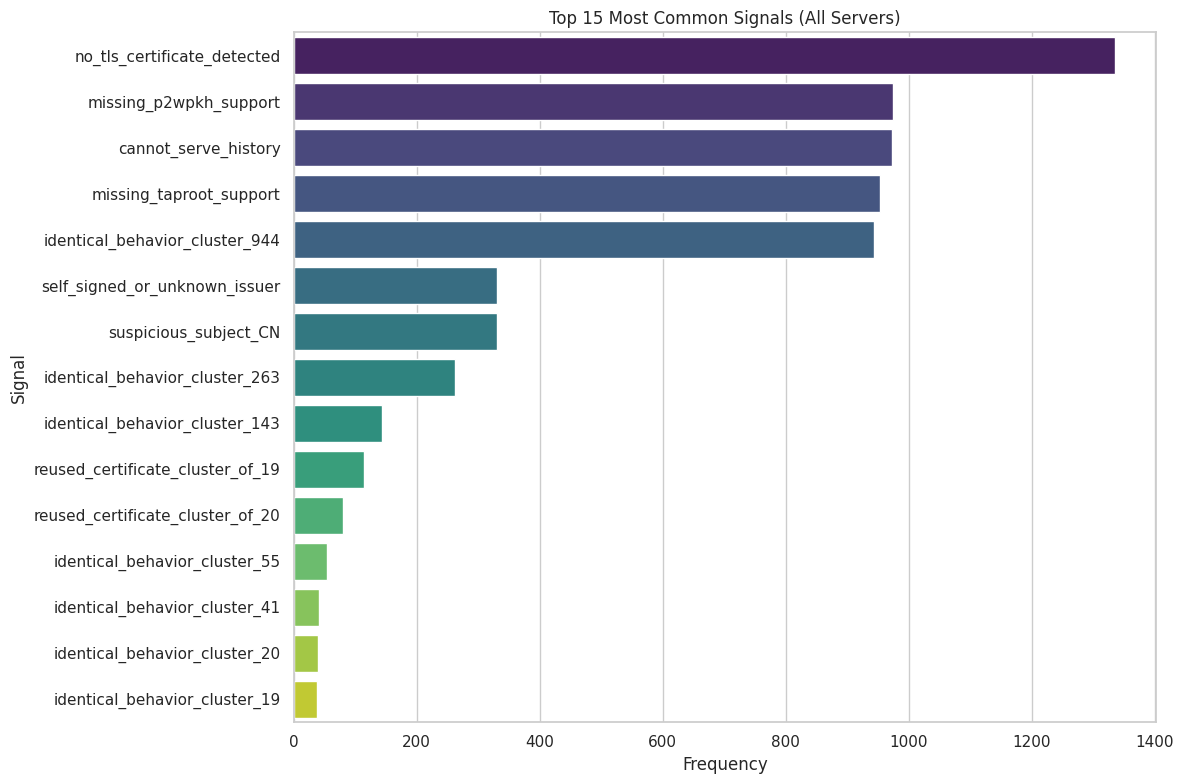

In [11]:
if not scores_df.empty:
    all_signals = scores_df.explode('signals')
    top_signals_all = all_signals['signals'].value_counts().head(15)

    plt.figure(figsize=(12, 8))
    sns.barplot(x=top_signals_all.values, y=top_signals_all.index, hue=top_signals_all.index, palette='viridis', legend=False)
    plt.title('Top 15 Most Common Signals (All Servers)')
    plt.xlabel('Frequency')
    plt.ylabel('Signal')
    plt.tight_layout()
    plt.show()

## Top High-Risk Servers
The following servers are identified as 'HIGH' risk, sorted by the highest honeypot score.

In [12]:
if not scores_df.empty:
    high_risk_servers = scores_df[scores_df['risk_level'] == 'HIGH'].sort_values(by='honeypot_score', ascending=False)
    print(f"Found {len(high_risk_servers)} servers with a HIGH risk level.")
    display(high_risk_servers[['host', 'port', 'honeypot_score', 'signals']].head(20))

Found 277 servers with a HIGH risk level.


,host,port,honeypot_score,signals
321,86.206.48.92,50002,100,"[reused_certificate_cluster_of_20, self_signed_or_unknown_issuer, suspicious_subject_CN, cannot_serve_history, missing_p2wpkh_support, missing_taproot_support, identical_behavior_cluster_15]"
893,86.206.48.92,50002,100,"[reused_certificate_cluster_of_20, self_signed_or_unknown_issuer, suspicious_subject_CN, cannot_serve_history, missing_p2wpkh_support, missing_taproot_support, identical_behavior_cluster_944]"
486,86.206.48.92,50002,100,"[reused_certificate_cluster_of_20, self_signed_or_unknown_issuer, suspicious_subject_CN, cannot_serve_history, missing_p2wpkh_support, missing_taproot_support, identical_behavior_cluster_944]"
291,86.206.48.92,50002,100,"[reused_certificate_cluster_of_20, self_signed_or_unknown_issuer, suspicious_subject_CN, cannot_serve_history, missing_p2wpkh_support, missing_taproot_support, identical_behavior_cluster_944]"
1124,148.251.87.112,50002,99,"[reused_certificate_cluster_of_19, self_signed_or_unknown_issuer, suspicious_subject_CN, cannot_serve_history, missing_p2wpkh_support, missing_taproot_support, identical_behavior_cluster_944]"
1619,148.251.87.112,50002,99,"[reused_certificate_cluster_of_19, self_signed_or_unknown_issuer, suspicious_subject_CN, cannot_serve_history, missing_p2wpkh_support, missing_taproot_support, identical_behavior_cluster_15]"
1458,148.251.87.112,50002,99,"[reused_certificate_cluster_of_19, self_signed_or_unknown_issuer, suspicious_subject_CN, cannot_serve_history, missing_p2wpkh_support, missing_taproot_support, identical_behavior_cluster_15]"
236,86.206.48.92,50002,98,"[reused_certificate_cluster_of_20, self_signed_or_unknown_issuer, suspicious_subject_CN, cannot_serve_history, missing_p2wpkh_support, identical_behavior_cluster_944]"
1285,86.206.48.92,50002,98,"[reused_certificate_cluster_of_20, self_signed_or_unknown_issuer, suspicious_subject_CN, cannot_serve_history, missing_p2wpkh_support, identical_behavior_cluster_15]"
1568,86.206.48.92,50002,98,"[reused_certificate_cluster_of_20, self_signed_or_unknown_issuer, suspicious_subject_CN, cannot_serve_history, missing_p2wpkh_support, identical_behavior_cluster_944]"


## Most Common Signals in High-Risk Servers
This graph shows the most frequent signals found specifically within the high-risk server group.

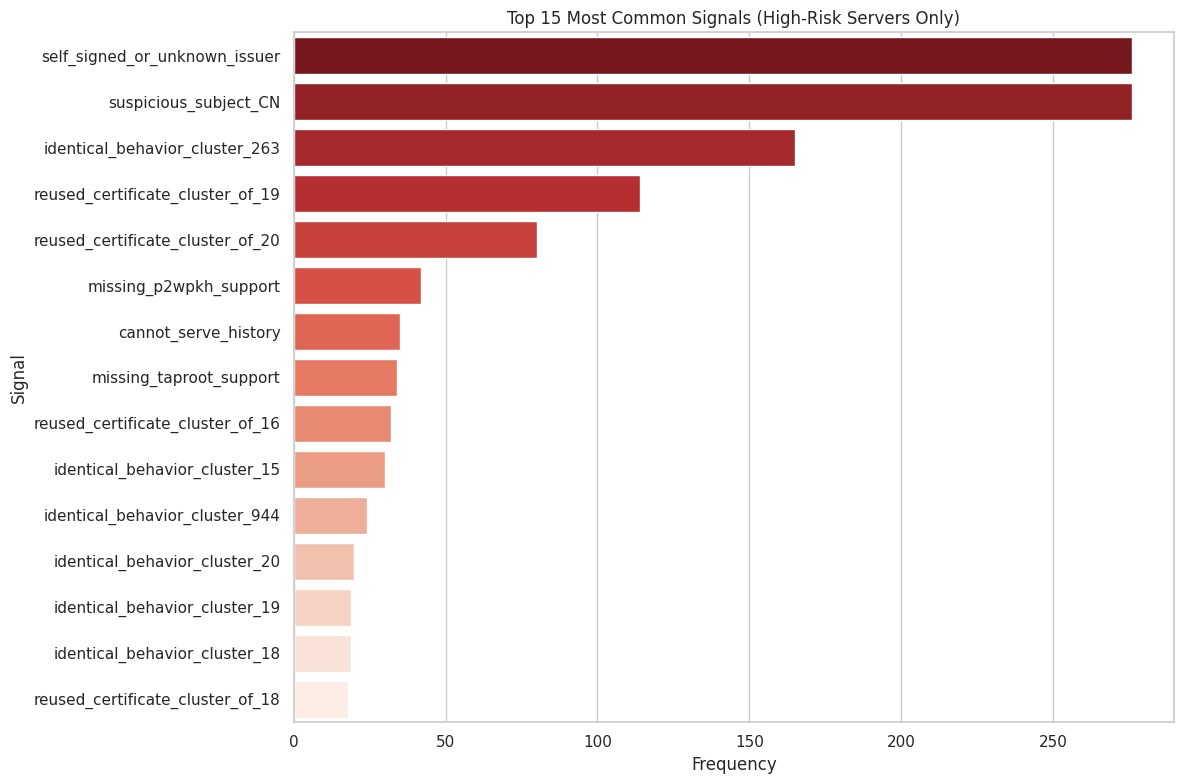

In [13]:
if not scores_df.empty and not high_risk_servers.empty:
    high_risk_signals = high_risk_servers.explode('signals')
    top_signals_high_risk = high_risk_signals['signals'].value_counts().head(15)
    
    plt.figure(figsize=(12, 8))
    sns.barplot(x=top_signals_high_risk.values, y=top_signals_high_risk.index, hue=top_signals_high_risk.index, palette='Reds_r', legend=False)
    plt.title('Top 15 Most Common Signals (High-Risk Servers Only)')
    plt.xlabel('Frequency')
    plt.ylabel('Signal')
    plt.tight_layout()
    plt.show()

## Top Low-Risk Servers
The following servers are identified as 'LOW' risk, sorted by the lowest honeypot score.

In [14]:
if not scores_df.empty:
    low_risk_servers = scores_df[scores_df['risk_level'] == 'LOW'].sort_values(by='honeypot_score', ascending=True)
    print(f"Found {len(low_risk_servers)} servers with a LOW risk level.")
    display(low_risk_servers[['host', 'port', 'honeypot_score', 'signals']].head(20))

Found 1 servers with a LOW risk level.


,host,port,honeypot_score,signals
92,45.154.252.109,50002,25,"[self_signed_or_unknown_issuer, suspicious_subject_CN, cannot_serve_history]"
